# Standard imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import HpAlgorithms
import HpTrainingFrame

In [9]:
df_mc=pd.read_hdf('/eos/user/j/jglatzer/L2Output_R20_Nov_v2_pandaspython3/pandas_ge6jge4b.h5', 'INC_ge6jge4b')

# Prepare classifier and training frame

split into test and training data

In [10]:
clf=HpAlgorithms.getGradientBDTClassifier()#options={"n_estimators":10})

In [11]:
htf=HpTrainingFrame.HpTrainingFrame(df_mc)

# Calibrate ROC AUC to Cross section

Fit results: [ 5.84983620e-03 -4.16702246e-03  1.22938606e-03 -1.36789294e-05]


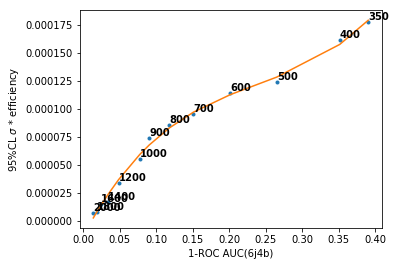

In [12]:
data = pd.read_csv('aucvsxslimit.txt', sep="\t", header=None)
data.columns=['mass','xslimit','oneminusauc']
z = np.polyfit(data.oneminusauc[5:], data.xslimit[5:], 3)
p = np.poly1d(z)

p1 = plt.plot(data.oneminusauc[5:], data.xslimit[5:], '.', data.oneminusauc[5:], p(data.oneminusauc[5:]), '-')
for line in range(5,data.shape[0]):
    plt.text(data.oneminusauc[line], data.xslimit[line]+0.000002, data.mass[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.gcf().subplots_adjust(left=0.2)
plt.xlabel("1-ROC AUC(6j4b)")
plt.ylabel("95%CL $\sigma$ * efficiency")
print "Fit results:", z

# Calculate the cross mass score

In [14]:
from sklearn.metrics import roc_auc_score
from HpMLUtils import WeightedStandardScaler

hpmasses=[200,225,250,275,300,350,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000]

def calculateCrossMassScore(clf, htf,hpmasses, normalizeInputs=False):
    """ calculate result of training for one mass point and evaluation on other mass point
        clf: classifier
        htf: HpTrainingFrame
        hpmasses, list of H+ masses
        normalizeInputs: if true the features are normalised to average 0 and variance 1 before fitting
    """

    X_train={}
    X_test={}
    X_eval={}
    y_train={}
    y_test={}
    y_eval={}
    w_train={}
    w_test={}
    w_eval={}
    
    if normalizeInputs:
        wss=WeightedStandardScaler()
    
    for hpmass in hpmasses:
        X_train[hpmass], X_test[hpmass], X_eval[hpmass], y_train[hpmass], y_test[hpmass],y_eval[hpmass], w_train[hpmass], w_test[hpmass], w_eval[hpmass]=htf.prepare(hpmass=hpmass)
        if normalizeInputs:
            wss.fit(X_train[hpmass])
            X_train[hpmass]=wss.transform(X_train[hpmass])
            X_test[hpmass]=wss.transform(X_test[hpmass])
    
    scorematrix=np.zeros((len(hpmasses),len(hpmasses)))
    
    for i,hpmass in enumerate(hpmasses):
        print "Training for m(H+)=", hpmass
 
        clf.fit(X_train[hpmass], y_train[hpmass], sample_weight=w_train[hpmass])
    
        for j,hpmass2 in enumerate(hpmasses):
            print "Evaluating for m(H+)=", hpmass2," -> ",
            score=1.-roc_auc_score(y_test[hpmass2], clf.decision_function(X_test[hpmass2]), sample_weight=w_test[hpmass2])
            scorematrix[i,j]=score
            print score
    return scorematrix

scorematrix=calculateCrossMassScore(clf,htf,hpmasses)

Training for m(H+)= 200
Evaluating for m(H+)= 200  ->  0.3290841140322679
Evaluating for m(H+)= 225  ->  0.38970884616572443
Evaluating for m(H+)= 250  ->  0.43424471983088697
Evaluating for m(H+)= 275  ->  0.46823732698993825
Evaluating for m(H+)= 300  ->  0.5004735878084714
Evaluating for m(H+)= 350  ->  0.5356872094330141
Evaluating for m(H+)= 400  ->  0.5621110848237549
Evaluating for m(H+)= 500  ->  0.6166156283891369
Evaluating for m(H+)= 600  ->  0.6391848910563508
Evaluating for m(H+)= 700  ->  0.6630102109233188
Evaluating for m(H+)= 800  ->  0.6824311193432019
Evaluating for m(H+)= 900  ->  0.6989353158794472
Evaluating for m(H+)= 1000  ->  0.7118059930123791
Evaluating for m(H+)= 1200  ->  0.7347691941862875
Evaluating for m(H+)= 1400  ->  0.7643910297991211
Evaluating for m(H+)= 1600  ->  0.778269778152973
Evaluating for m(H+)= 1800  ->  0.798298532598569
Evaluating for m(H+)= 2000  ->  0.8191778264083365
Training for m(H+)= 225
Evaluating for m(H+)= 200  ->  0.362151377778

Evaluating for m(H+)= 1400  ->  0.2136211541664783
Evaluating for m(H+)= 1600  ->  0.24704836972316124
Evaluating for m(H+)= 1800  ->  0.2720413648847759
Evaluating for m(H+)= 2000  ->  0.2933406336677751
Training for m(H+)= 700
Evaluating for m(H+)= 200  ->  0.5475697279499445
Evaluating for m(H+)= 225  ->  0.5568945836443148
Evaluating for m(H+)= 250  ->  0.5454849297350552
Evaluating for m(H+)= 275  ->  0.5305802730591251
Evaluating for m(H+)= 300  ->  0.48950185339378083
Evaluating for m(H+)= 350  ->  0.43635382852626436
Evaluating for m(H+)= 400  ->  0.38071730804227366
Evaluating for m(H+)= 500  ->  0.2735917226021829
Evaluating for m(H+)= 600  ->  0.19668600822271765
Evaluating for m(H+)= 700  ->  0.14718158177504637
Evaluating for m(H+)= 800  ->  0.12348539434224393
Evaluating for m(H+)= 900  ->  0.11403254964546261
Evaluating for m(H+)= 1000  ->  0.1133717379626008
Evaluating for m(H+)= 1200  ->  0.12099995518016604
Evaluating for m(H+)= 1400  ->  0.14230635748180465
Evaluatin

In [15]:
from array import array

def plotCrossMassScore(scorematrix1, scorematrix2=None, convertToXSec=False):
    # score matrices can be read from txt file
    # scorematrix1_orig=np.loadtxt("scorematrixnew_normal.txt")
    # scorematrix2_orig=np.loadtxt("scorematrixnew.txt")

    if convertToXSec:
        #z=array("f",[ 5.84983620e-03, -4.16702246e-03,  1.22938606e-03, -1.36789294e-05])
        f=np.poly1d(z)
        this_scorematrix1=f(scorematrix1[5:,5:].copy()) #do not take first 5 values as conversion to xsec is not reliable there
        if not scorematrix2 is None:
            this_scorematrix2=f(scorematrix2[5:,5:].copy())
    else:
        this_scorematrix1=scorematrix1.copy()
        if not scorematrix2 is None:
            this_scorematrix2=scorematrix2.copy()

    title="Normalized input variables"

    hpmassesorig=[200,225,250,275,300,350,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000]
    if convertToXSec:
        hpmasses=hpmassesorig[5:]
    else:
        hpmasses=hpmassesorig
        
    #first plot: compare the results for both methods if evaluated and trained at same mass point (expect same result)
    if not scorematrix2 is None:
        diag1=[scorematrix1[j,j] for j in range(0,scorematrix1.shape[0])]
        diag2=[scorematrix2[j,j] for j in range(0,scorematrix2.shape[0])]

        fig, ax = plt.subplots()
        plt.plot(hpmassesorig, diag1,"-", label="normalised")
        plt.plot(hpmassesorig, diag2,"--", label="default")
        plt.legend(loc="upper right")
        plt.xlabel("H+ mass for evaluation")
        plt.ylabel("ROC AUC")
        plt.show()

    #second plot: one line per training and evaluating it for multiple mass points
    for j in range(this_scorematrix1.shape[1]): #j=index for evaluation
        diag1=this_scorematrix1[j,j]
        #print "Diag:", j, diag1,
        if not scorematrix2 is None: 
            diag2=this_scorematrix2[j,j]
            #print diag2
        #else:
            #print
        for i in range(this_scorematrix1.shape[0]): #i=index for training
            before=this_scorematrix1[i,j]
            this_scorematrix1[i,j]=(this_scorematrix1[i,j]/diag1-1.)*100 #take difference in % to diagonal value, i.e. trained and evaluated at same mass point (=ideal case)
            if not scorematrix2 is None:
                this_scorematrix2[i,j]=(this_scorematrix2[i,j]/diag2-1.)*100
            #print i,j, before, this_scorematrix1[i,j], diag1

    fig, ax = plt.subplots()

    ax.set_ylim(0, 25)
    color=iter(plt.cm.rainbow(np.linspace(0,1,this_scorematrix1.shape[1])))
    for j in range(this_scorematrix1.shape[1]):
        if j %2==0:
            c=next(color)
            plt.plot(hpmasses[max(0,j-4):j+4], this_scorematrix1[max(0,j-4):j+4,j],"-",c=c, label="m(H+)="+str(hpmasses[j])+" GeV") #take only +/-4 mass points for curve to unclutter plot
            plt.plot(hpmasses[max(0,j-4):j+4], this_scorematrix1[max(0,j-4):j+4,j],"*",c=c)
            if not scorematrix2 is None:
                plt.plot(hpmasses[max(0,j-4):j+4], this_scorematrix2[max(0,j-4):j+4,j],"--",c=c)#, label="m(H+)="+str(hpmasses[j])+" GeV")
                #plt.plot(hpmasses[max(0,j-4):j+4], this_scorematrix2[max(0,j-4):j+4,j],"-",c=c, label="m(H+)="+str(hpmasses[j])+" GeV")
                plt.plot(hpmasses[max(0,j-4):j+4], this_scorematrix2[max(0,j-4):j+4,j],"*",c=c)

    plt.xlabel("H+ mass for evaluation")
    if convertToXSec:
        plt.ylabel("% difference to 95% excluded XS at ideal mass for training")
    else:
        plt.ylabel("% difference to ROC at ideal mass for training")

    plt.legend(loc="upper right",title="Training mass")


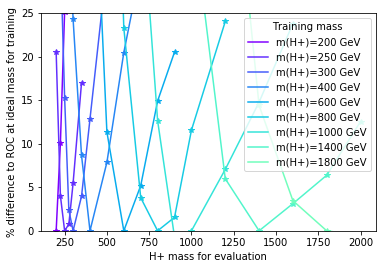

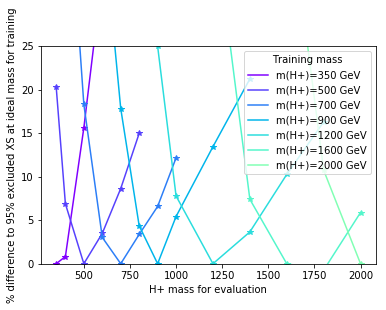

In [16]:
plotCrossMassScore(scorematrix)
plotCrossMassScore(scorematrix,convertToXSec=True)


# Trying with normalised inputs

In [18]:
scorematrix_normalised=calculateCrossMassScore(clf,htf,hpmasses,normalizeInputs=True)

Training for m(H+)= 200
Evaluating for m(H+)= 200  ->  0.3290841140322679
Evaluating for m(H+)= 225  ->  0.3873821792854871
Evaluating for m(H+)= 250  ->  0.4318800657988413
Evaluating for m(H+)= 275  ->  0.46330519784697755
Evaluating for m(H+)= 300  ->  0.49680413243107646
Evaluating for m(H+)= 350  ->  0.5331916864339244
Evaluating for m(H+)= 400  ->  0.558982730238242
Evaluating for m(H+)= 500  ->  0.6150087897111629
Evaluating for m(H+)= 600  ->  0.6390448225852752
Evaluating for m(H+)= 700  ->  0.6680924037524176
Evaluating for m(H+)= 800  ->  0.6875924125187132
Evaluating for m(H+)= 900  ->  0.7062862014855821
Evaluating for m(H+)= 1000  ->  0.7158300400215436
Evaluating for m(H+)= 1200  ->  0.7400665447170158
Evaluating for m(H+)= 1400  ->  0.7644402259547682
Evaluating for m(H+)= 1600  ->  0.7722602483783488
Evaluating for m(H+)= 1800  ->  0.7843603551417064
Evaluating for m(H+)= 2000  ->  0.802808520697938
Training for m(H+)= 225
Evaluating for m(H+)= 200  ->  0.3616495594393

Evaluating for m(H+)= 700  ->  0.22444670421987523
Evaluating for m(H+)= 800  ->  0.1671849855788281
Evaluating for m(H+)= 900  ->  0.12480724812755606
Evaluating for m(H+)= 1000  ->  0.09925587537247371
Evaluating for m(H+)= 1200  ->  0.06098089966246023
Evaluating for m(H+)= 1400  ->  0.042655857519142026
Evaluating for m(H+)= 1600  ->  0.02922366056997261
Evaluating for m(H+)= 1800  ->  0.022549141316753563
Evaluating for m(H+)= 2000  ->  0.016057123890930947


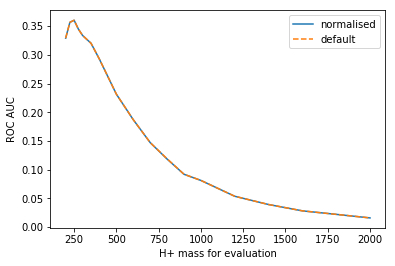

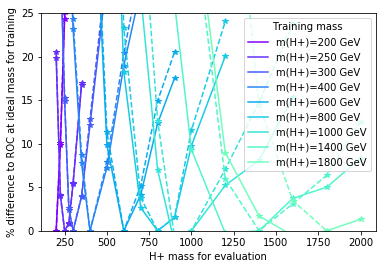

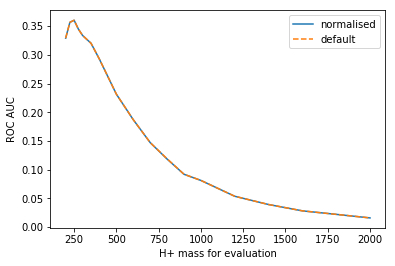

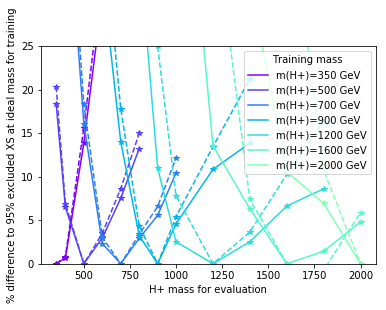

In [19]:
plotCrossMassScore(scorematrix_normalised, scorematrix)
plotCrossMassScore(scorematrix_normalised, scorematrix, convertToXSec=True)